<a href="https://colab.research.google.com/github/shubham-kashyapi/CS6910-Deep-Learning-Assignment-4/blob/main/A4_Q6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload() # Upload the file RBM_model.py

Saving RBM_model.py to RBM_model.py


{'RBM_model.py': b'import numpy as np\nfrom tqdm import tqdm\n\nclass RBM:\n    def __init__(self, num_visible, num_hidden):\n        \'\'\'\n        Initializes the parameters of a RBM\n        Parameters:\n        num_visible - int, num_hidden - int\n        Returns:\n        None\n        \'\'\'\n        self.num_visible = num_visible\n        self.num_hidden = num_hidden\n        #######################################\n        # Random initialization of parameters\n        #######################################\n        self.W = np.random.normal(size = (self.num_hidden, self.num_visible))\n        self.b = np.random.normal(size = (1, self.num_visible))\n        self.c = np.random.normal(size = (self.num_hidden, 1))\n        return\n    \n    def check_data_format(self, input_data):\n        \'\'\'\n        Checks the format of visible variables\n        \n        Parameters:\n        input_data - 2d numpy array (dtype=float, size = (num_samples, num_visible))\n        Should cont

In [2]:
!pip install wandb
import numpy as np
from keras.datasets import fashion_mnist # Used only for loading the data
from RBM_model import RBM
from sklearn.linear_model import LogisticRegression
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import wandb
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

     |████████████████████████████████| 1.8MB 5.4MB/s 
     |████████████████████████████████| 133kB 24.3MB/s 
     |████████████████████████████████| 174kB 27.4MB/s 
     |████████████████████████████████| 102kB 10.1MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=b95b1f9c67f8c37566e2c0f13e65939e41449371edeca6d6b954264987cd827b
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=3f9242a6c30228ad493ae60686748d98a6d0cb3bc534c47a0fcfa357c3f22977
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
###############################
# Preparing the data
###############################
# Loading the pre-shuffled fashion mnist dataset
(X_fashion_train, y_fashion_train), (X_fashion_test, y_fashion_test) = fashion_mnist.load_data()
# Using only a part of the training data and splitting it into training and validation sets
X_train = (X_fashion_train.reshape(60000, 784)[:10000, :] > 127).astype(float)
y_train = y_fashion_train[:10000]
X_val = (X_fashion_train.reshape(60000, 784)[10000 : 12500, :] > 127).astype(float)
y_val = y_fashion_train[10000 : 12500]
# Using only a part of the test data
X_test = (X_fashion_test.reshape(10000, 784)[:2500, :] > 127).astype(float)
y_test = y_fashion_test[:2500]
# Checking the shapes
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(10000, 784) (10000,) (2500, 784) (2500,) (2500, 784) (2500,)


In [4]:
####################################################
# Training the model using the best hyperparameters
# for Contrastive Divergence
####################################################
RBM_best_mod = RBM(num_visible = 784, num_hidden = 256)
RBM_best_mod.train(input_data = X_train, train_type = "CD", epochs = 10, \
                  k = 10, eta = 1e-2)


100%|██████████| 10/10 [11:46<00:00, 70.65s/it]


In [5]:
##################################################
# Logging the sample images to wandb
##################################################
wandb.init()

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


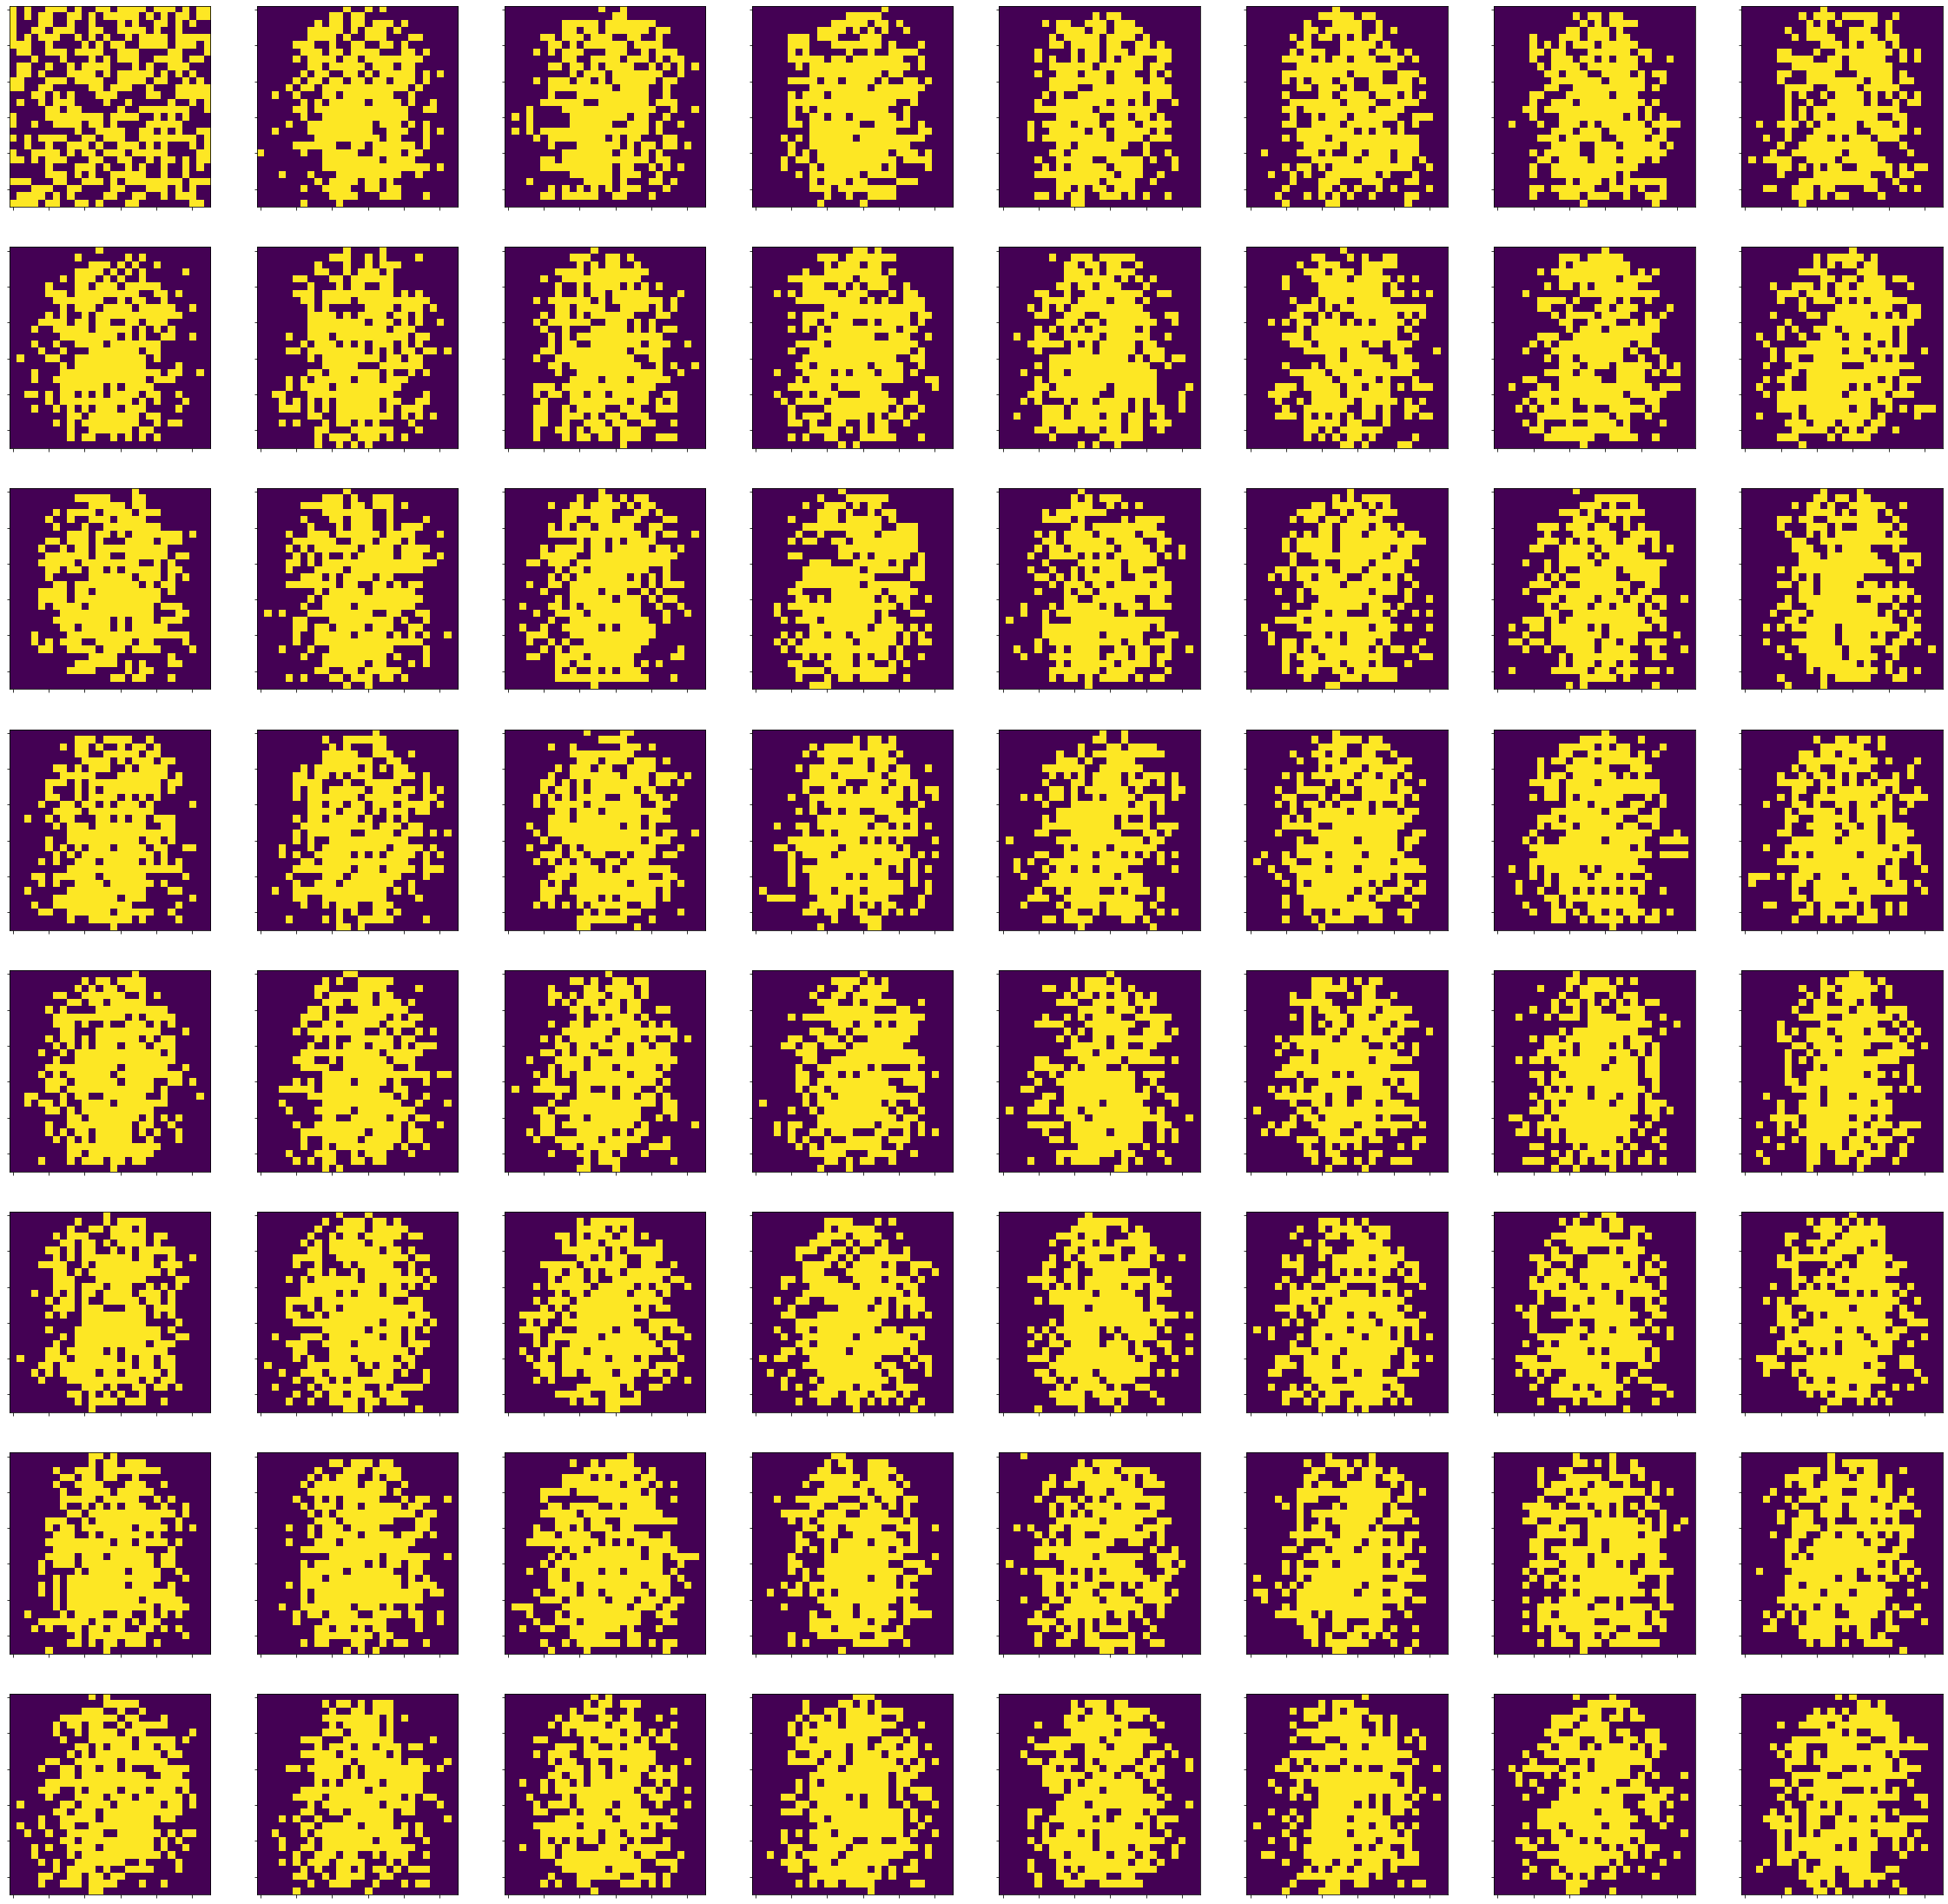

In [6]:
##################################################
# Sampling images
##################################################
fig, axs = plt.subplots(8, 8, figsize = (40, 40))
visible_vars = np.random.randint(low = 0, high = 2, size = (1, 784)).astype(float)
for sample_num in range(64):
    axs[int(sample_num/8), sample_num%8].imshow(visible_vars.reshape(28, 28))
    axs[int(sample_num/8), sample_num%8].set_yticklabels([])
    axs[int(sample_num/8), sample_num%8].set_xticklabels([])
    # Alternately sampling hidden and visible variables
    hidden_vars = RBM_best_mod.get_hidden_rep(visible_vars)
    visible_vars = RBM_best_mod.get_visible_rep(hidden_vars)
    

wandb.log({'Visualized samples for Gibbs chain': [wandb.Image(fig)]})